# Data Preparation t




In [2]:
pip install scanpy

     |████████████████████████████████| 2.0 MB 10.7 MB/s 
     |████████████████████████████████| 88 kB 5.3 MB/s 
     |████████████████████████████████| 11.2 MB 55.2 MB/s 
     |████████████████████████████████| 96 kB 2.3 MB/s 
     |████████████████████████████████| 930 kB 61.5 MB/s 
     |████████████████████████████████| 1.1 MB 14.3 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=44d79396496d5a2c616f2079f674f086f29740a9eaf3a570615432e43565e3e7
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=aa0042e51a00b95fdf4037d01ee6579a750096f45a720e5344e8a2dcd0330716
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for session-info: filename=session_info-1.0.0-py3-n

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

sc.settings.set_figure_params(dpi=80)
%matplotlib inline

In [3]:
# Load the stored data object
input_file = '/data_mrna_seq_v2_rsem_zscores_ref_normal_samples.txt'


# and now transformations that conform to the expectation of AnnData 
# of string indexes, their exact values, and other idiosyncrasies 
raw_data = pd.read_table(input_file, sep='\t', header=None)
#an alternative for loading data matrix (but is not effective)
#data_matrix = pd.read_table(input_file, sep='\t', header=None, skiprows=range(0, 0), usecols=range(2, 512)).transpose()
data_matrix = raw_data.iloc[:,2:].transpose()
data_matrix.fillna(0.0, inplace=True)
data_matrix.rename(columns={0: 'sample'}, inplace=True)
data_matrix.set_index('sample', inplace=True)
data_matrix.columns = data_matrix.columns.astype('str')
#an alternative for loading observations (but is not effective)
#observations = pd.read_table(input_file, sep='\t', header=None, skiprows=range(1, 20532), usecols=range(2, 512)).transpose()
observations = raw_data.iloc[:1, 2:].transpose()
observations.rename(columns={0: 'sample'}, inplace=True)
observations['patient'] = observations['sample'].str[:12]
observations['patient_group'] = observations['sample'].str[:7].astype('category')
#observations.reset_index(drop=True)
observations.set_index('sample', inplace=True)
#an alternative for loading variables (but is not effective)
#variables =  pd.read_table(input_file, sep='\t', header=None, skiprows=range(0,1), usecols=range(0, 2))
variables = raw_data.iloc[1:, 0:2]
variables.rename(columns={0: 'Hugo_Symbol', 1:'Entrez_Gene_Id'}, inplace=True)
variables['index'] = variables.index
#only needed if working with direct reading of the table from file:
#variables['index'] += 1
variables['index'] = variables['index'].astype(str)
variables.set_index('index', inplace=True)

raw_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,Hugo_Symbol,Entrez_Gene_Id,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
1,NaN,100130426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,100133144,-0.0353,-0.4349,-0.4268,0.1178,-1.3313,-1.1036,-0.4494,-1.2655,...,0.1593,-1.1972,-1.6536,0.5776,0.8607,0.5135,-0.2466,1.8386,0.3907,0.8722
3,UBE2Q2P2,100134869,-0.0307,0.133,-1.0444,-0.6817,-1.8518,0.3053,-0.6803,0.0907,...,0.0663,-0.2701,-0.5265,-0.6904,0.6856,1.1818,-0.178,3.4109,1.2706,-0.4121
4,HMGB1P1,10357,-2.8954,-0.1829,-2.9011,-0.5842,-1.1841,-1.5852,0.6671,-2.2658,...,2.5039,1.4855,0.347,-0.6065,0.2878,0.2772,-1.05,-0.4475,-1.955,-0.9185


In [4]:
data_matrix.head()

,1,2,3,4,5,6,7,8,9,10,...,20522,20523,20524,20525,20526,20527,20528,20529,20530,20531
sample,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,0.0,-0.0353,-0.0307,-2.8954,1.7786,0.0,2.3132,0.2043,0.0,0.0,...,2.1032,4.0661,-1.1426,-1.1659,-0.9328,-0.7040,0.3973,-2.6391,-1.5597,0.3740
TCGA-05-4249-01,0.0,-0.4349,0.133,-0.1829,2.1286,0.0,0.8965,1.0067,0.0,0.0,...,1.4894,2.7074,0.6910,1.1827,0.0517,5.0105,-1.5295,-3.2362,-0.8057,1.4777
TCGA-05-4250-01,0.0,-0.4268,-1.0444,-2.9011,2.9987,0.0,-0.7793,-2.1634,0.0,0.0,...,6.9955,5.6950,0.5476,-0.1674,-1.5433,5.5920,-4.5388,-0.5748,-0.7265,-0.0895
TCGA-05-4382-01,0.0,0.1178,-0.6817,-0.5842,1.5703,0.0,1.718,-0.8709,0.0,0.0,...,5.8944,4.9330,-1.0764,-0.4027,-0.9956,7.5633,-0.6799,0.1212,-0.7296,1.2411
TCGA-05-4384-01,0.0,-1.3313,-1.8518,-1.1841,0.0756,0.0,1.9364,-0.5877,0.0,0.0,...,2.9887,1.2673,1.7380,1.7759,0.5915,3.0505,-1.5952,-2.1206,0.3884,1.7606


In [5]:
data_matrix.shape

(510, 20531)

In [6]:
observations.head()

,patient,patient_group
sample,,
TCGA-05-4244-01,TCGA-05-4244,TCGA-05
TCGA-05-4249-01,TCGA-05-4249,TCGA-05
TCGA-05-4250-01,TCGA-05-4250,TCGA-05
TCGA-05-4382-01,TCGA-05-4382,TCGA-05
TCGA-05-4384-01,TCGA-05-4384,TCGA-05


In [7]:
observations.index

Index(['TCGA-05-4244-01', 'TCGA-05-4249-01', 'TCGA-05-4250-01',
       'TCGA-05-4382-01', 'TCGA-05-4384-01', 'TCGA-05-4389-01',
       'TCGA-05-4390-01', 'TCGA-05-4395-01', 'TCGA-05-4396-01',
       'TCGA-05-4397-01',
       ...
       'TCGA-NJ-A4YG-01', 'TCGA-NJ-A4YI-01', 'TCGA-NJ-A4YP-01',
       'TCGA-NJ-A4YQ-01', 'TCGA-NJ-A55A-01', 'TCGA-NJ-A55O-01',
       'TCGA-NJ-A55R-01', 'TCGA-NJ-A7XG-01', 'TCGA-O1-A52J-01',
       'TCGA-S2-AA1A-01'],
      dtype='object', name='sample', length=510)

In [8]:
variables.head()

,Hugo_Symbol,Entrez_Gene_Id
index,,
1,NaN,100130426
2,NaN,100133144
3,UBE2Q2P2,100134869
4,HMGB1P1,10357
5,NaN,10431


In [9]:
data_matrix.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '20522', '20523', '20524', '20525', '20526', '20527', '20528', '20529',
       '20530', '20531'],
      dtype='object', length=20531)

In [10]:
data_matrix.columns.equals(variables.index)

True

In [11]:
adata = sc.AnnData(X=data_matrix, obs=observations, var=variables)
print(adata.var)


/usr/local/lib/python3.7/dist-packages/anndata/utils.py:143: UserWarning: X converted to numpy array with dtype object
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


      Hugo_Symbol Entrez_Gene_Id
index                           
1             NaN      100130426
2             NaN      100133144
3        UBE2Q2P2      100134869
4         HMGB1P1          10357
5             NaN          10431
...           ...            ...
20527      ZYG11A         440590
20528      ZYG11B          79699
20529         ZYX           7791
20530       ZZEF1          23140
20531        ZZZ3          26009

[20531 rows x 2 columns]


In [12]:
adata.obs

,patient,patient_group
sample,,
TCGA-05-4244-01,TCGA-05-4244,TCGA-05
TCGA-05-4249-01,TCGA-05-4249,TCGA-05
TCGA-05-4250-01,TCGA-05-4250,TCGA-05
TCGA-05-4382-01,TCGA-05-4382,TCGA-05
TCGA-05-4384-01,TCGA-05-4384,TCGA-05
...,...,...
TCGA-NJ-A55O-01,TCGA-NJ-A55O,TCGA-NJ
TCGA-NJ-A55R-01,TCGA-NJ-A55R,TCGA-NJ
TCGA-NJ-A7XG-01,TCGA-NJ-A7XG,TCGA-NJ


In [13]:
print(adata.X)

[[ 0.     -0.0353 -0.0307 ... -2.6391 -1.5597  0.374 ]
 [ 0.     -0.4349  0.133  ... -3.2362 -0.8057  1.4777]
 [ 0.     -0.4268 -1.0444 ... -0.5748 -0.7265 -0.0895]
 ...
 [ 0.      1.8386  3.4109 ... -3.7574 -0.1728 -1.4331]
 [ 0.      0.3907  1.2706 ... -1.1874  0.0121 -0.7474]
 [ 0.      0.8722 -0.4121 ... -0.6284  0.1256 -0.3581]]


In [14]:
print(adata.obs['patient'].value_counts())

TCGA-05-4244    1
TCGA-78-7153    1
TCGA-78-7535    1
TCGA-78-7220    1
TCGA-78-7167    1
               ..
TCGA-55-6971    1
TCGA-55-6970    1
TCGA-55-6969    1
TCGA-55-6968    1
TCGA-S2-AA1A    1
Name: patient, Length: 510, dtype: int64


In [15]:
 adata.var_names

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '20522', '20523', '20524', '20525', '20526', '20527', '20528', '20529',
       '20530', '20531'],
      dtype='object', name='index', length=20531)

In [16]:
# mitochondrial genes
adata.var['mt'] = adata.var['Hugo_Symbol'].str.startswith('MT-') 
# ribosomal genes
adata.var['ribo'] = adata.var['Hugo_Symbol'].str.startswith(("RPS","RPL"))
# hemoglobin genes.
adata.var['hb'] = adata.var['Hugo_Symbol'].str.contains(("^HB[^(P)]"))

adata.var.fillna({'mt':False, 'ribo':False, 'hb':False}, inplace=True)

adata.var [adata.var['hb'] != True]

,Hugo_Symbol,Entrez_Gene_Id,mt,ribo,hb
index,,,,,
1,NaN,100130426,False,False,False
2,NaN,100133144,False,False,False
3,UBE2Q2P2,100134869,False,False,False
4,HMGB1P1,10357,False,False,False
5,NaN,10431,False,False,False
...,...,...,...,...,...
20527,ZYG11A,440590,False,False,False
20528,ZYG11B,79699,False,False,False
20529,ZYX,7791,False,False,False


In [17]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [18]:
adata.obs

,patient,patient_group,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
sample,,,,,,,,,,
TCGA-05-4244-01,TCGA-05-4244,TCGA-05,19303,-4964.973145,0.0,-0.0,81.688995,-1.645306,-26.188700,0.527469
TCGA-05-4249-01,TCGA-05-4249,TCGA-05,19303,-5209.614258,0.0,-0.0,16.234894,-0.311633,-24.245600,0.465401
TCGA-05-4250-01,TCGA-05-4250,TCGA-05,19303,-6279.888672,0.0,-0.0,89.659698,-1.427727,-6.732199,0.107203
TCGA-05-4382-01,TCGA-05-4382,TCGA-05,19303,1124.753906,0.0,0.0,20.030001,1.780834,-15.204500,-1.351807
TCGA-05-4384-01,TCGA-05-4384,TCGA-05,19303,-5113.912109,0.0,-0.0,-38.099117,0.745009,-15.191999,0.297072
...,...,...,...,...,...,...,...,...,...,...
TCGA-NJ-A55O-01,TCGA-NJ-A55O,TCGA-NJ,19302,-7140.599609,0.0,-0.0,78.455704,-1.098727,-23.624699,0.330850
TCGA-NJ-A55R-01,TCGA-NJ-A55R,TCGA-NJ,19303,7840.654785,0.0,0.0,-61.239304,-0.781048,-18.073400,-0.230509
TCGA-NJ-A7XG-01,TCGA-NJ-A7XG,TCGA-NJ,19303,-11404.161133,0.0,-0.0,121.449783,-1.064960,-36.528397,0.320308


In [19]:
adata.obs['total_counts']

sample
TCGA-05-4244-01    -4964.973145
TCGA-05-4249-01    -5209.614258
TCGA-05-4250-01    -6279.888672
TCGA-05-4382-01     1124.753906
TCGA-05-4384-01    -5113.912109
                       ...     
TCGA-NJ-A55O-01    -7140.599609
TCGA-NJ-A55R-01     7840.654785
TCGA-NJ-A7XG-01   -11404.161133
TCGA-O1-A52J-01    -4005.704590
TCGA-S2-AA1A-01    -1753.815918
Name: total_counts, Length: 510, dtype: float32

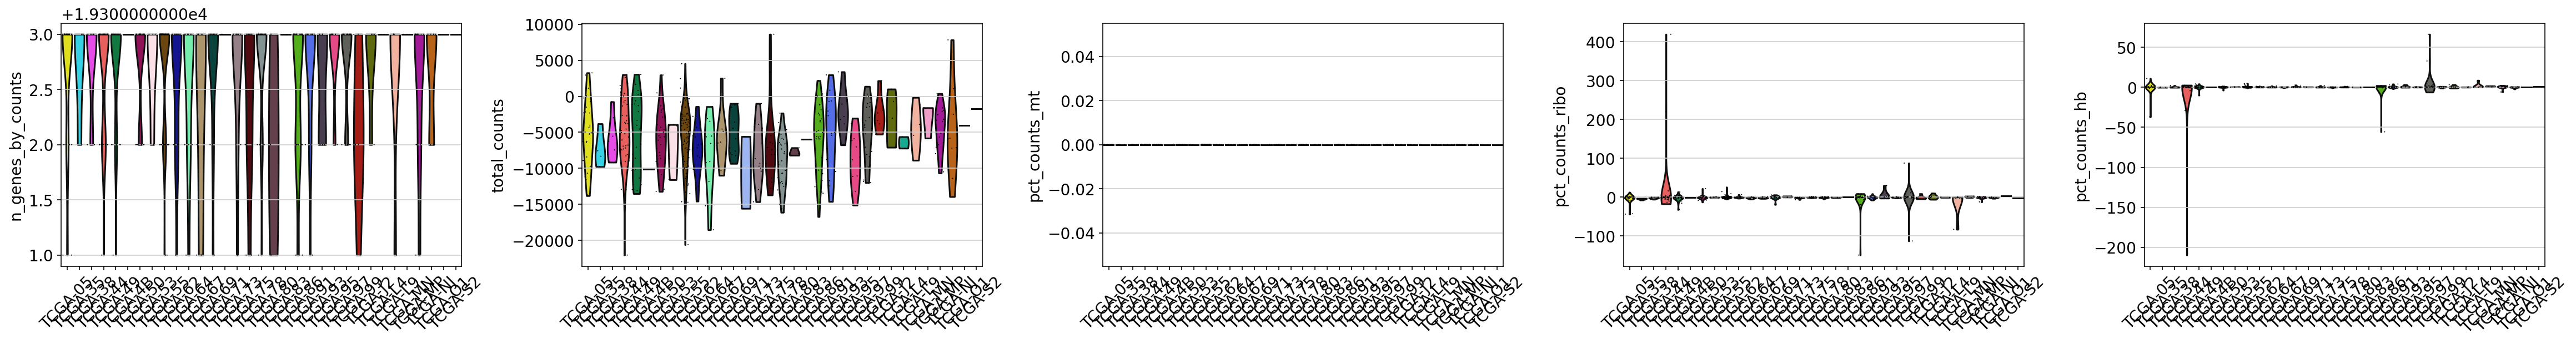

In [20]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'patient_group', rotation= 45)

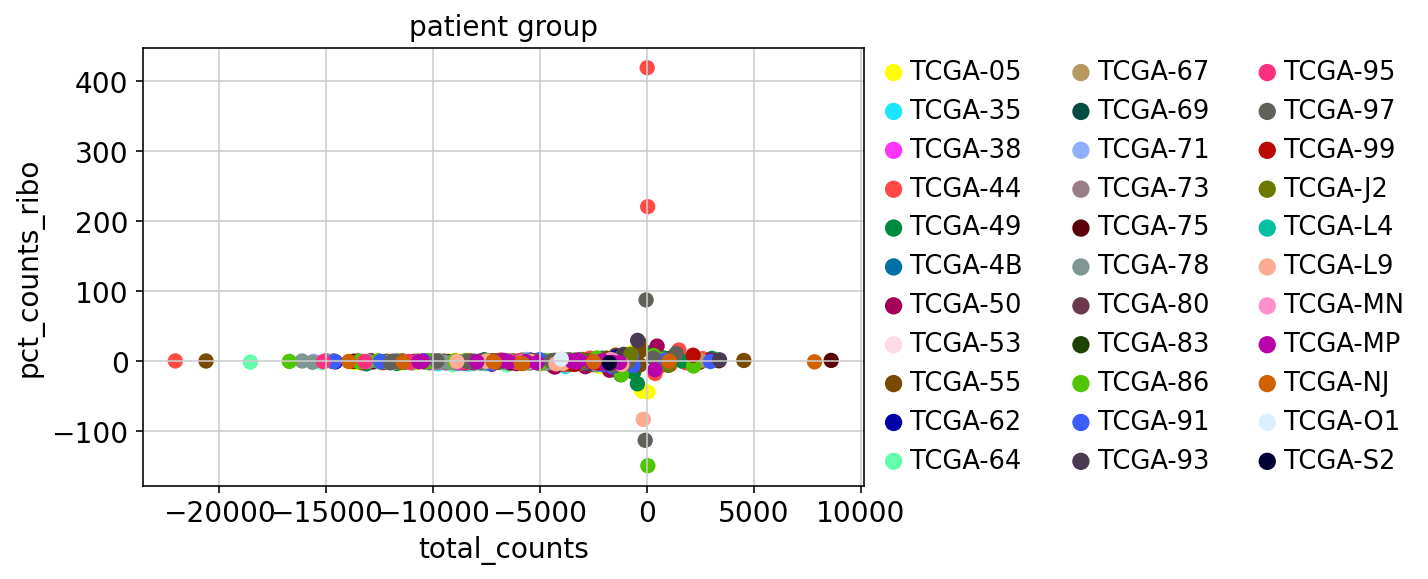

In [21]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_ribo', color="patient_group")

In [22]:
#meaning filtering samples in our case:
#sc.pp.filter_cells(adata, min_genes=18000)
#sc.pp.filter_genes(adata, min_cells=50)

print(adata.n_obs, adata.n_vars)

510 20531


normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


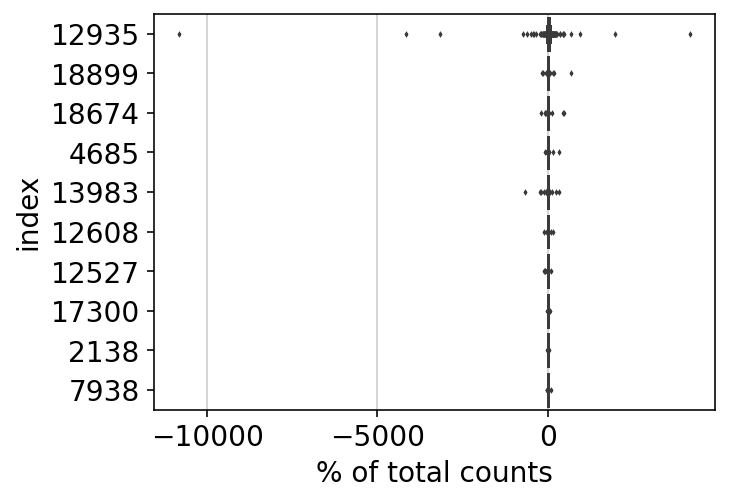

In [25]:
sc.pl.highest_expr_genes(adata, n_top=10)

In [46]:
adata.var.loc[['12935','18899','18674','4685','13983','12608','12527','17300','2138','7938']]

,Hugo_Symbol,Entrez_Gene_Id,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
index,,,,,,,,,
12935,PWAR4,347745,False,False,False,510,-1489.387451,0.0,-759587.625000
18899,TTLL8,164714,False,False,False,510,-51.310444,0.0,-26168.326172
18674,TRIM49,57093,False,False,False,510,7.375471,0.0,3761.490234
4685,DCAF4L2,138009,False,False,False,510,-2.075404,0.0,-1058.456055
13983,PRAMEF12,390999,False,False,False,510,-83.758430,0.0,-42716.800781
12608,OR56A3,390083,False,False,False,510,-7.332170,0.0,-3739.406738
12527,OR4D1,26689,False,False,False,510,-35.172489,0.0,-17937.968750
17300,SSX4,6759,False,False,False,510,-0.369643,0.0,-188.517700
2138,C1orf105,92346,False,False,False,510,-3.291376,0.0,-1678.601807


In [27]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)
sc.tl.umap(adata)

computing PCA
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 10


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


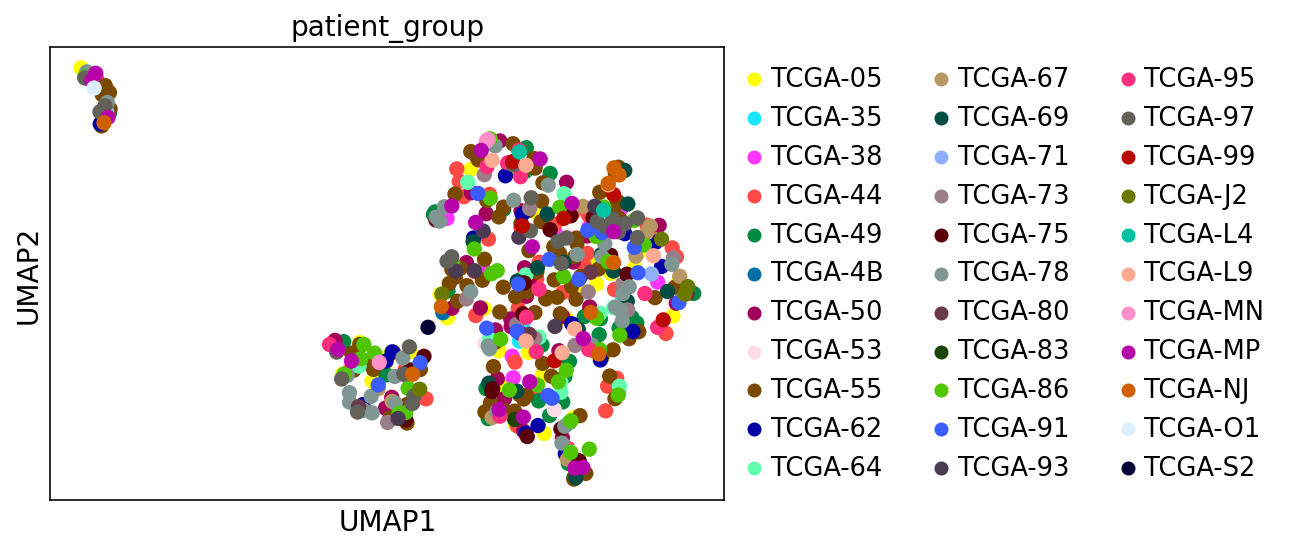

In [28]:
#it would be great to color by cancer, cancer stage, etc (requires connecting the data sets)
#This is applicable to the rest of the visualizations
sc.pl.umap(adata, color=['patient_group'])

In [29]:
sc.tl.tsne(adata, n_pcs = 30)

computing tSNE
    using 'X_pca' with n_pcs = 30
    using sklearn.manifold.TSNE


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:02)


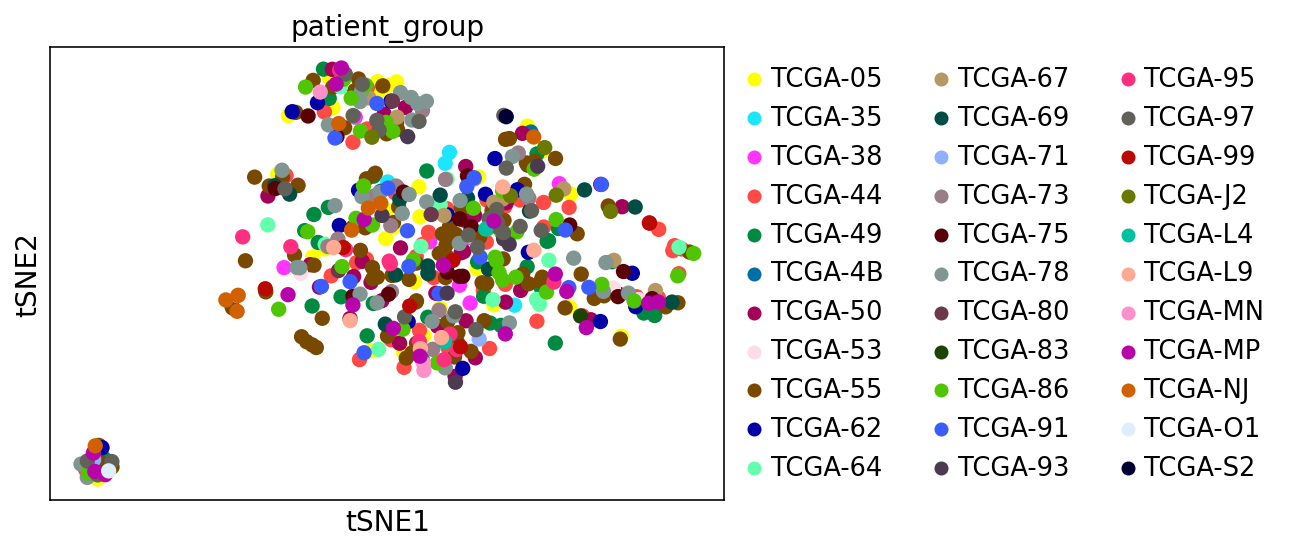

In [30]:
sc.pl.tsne(adata, color='patient_group')

In [36]:
pip install leidenalg

     |████████████████████████████████| 1.3 MB 11.8 MB/s 
     |████████████████████████████████| 3.1 MB 50.5 MB/s 


In [37]:
sc.tl.leiden(adata, key_added = "leiden_1.0") # default resolution in 1.0
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden_0.4")
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")

running Leiden clustering
    finished: found 14 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


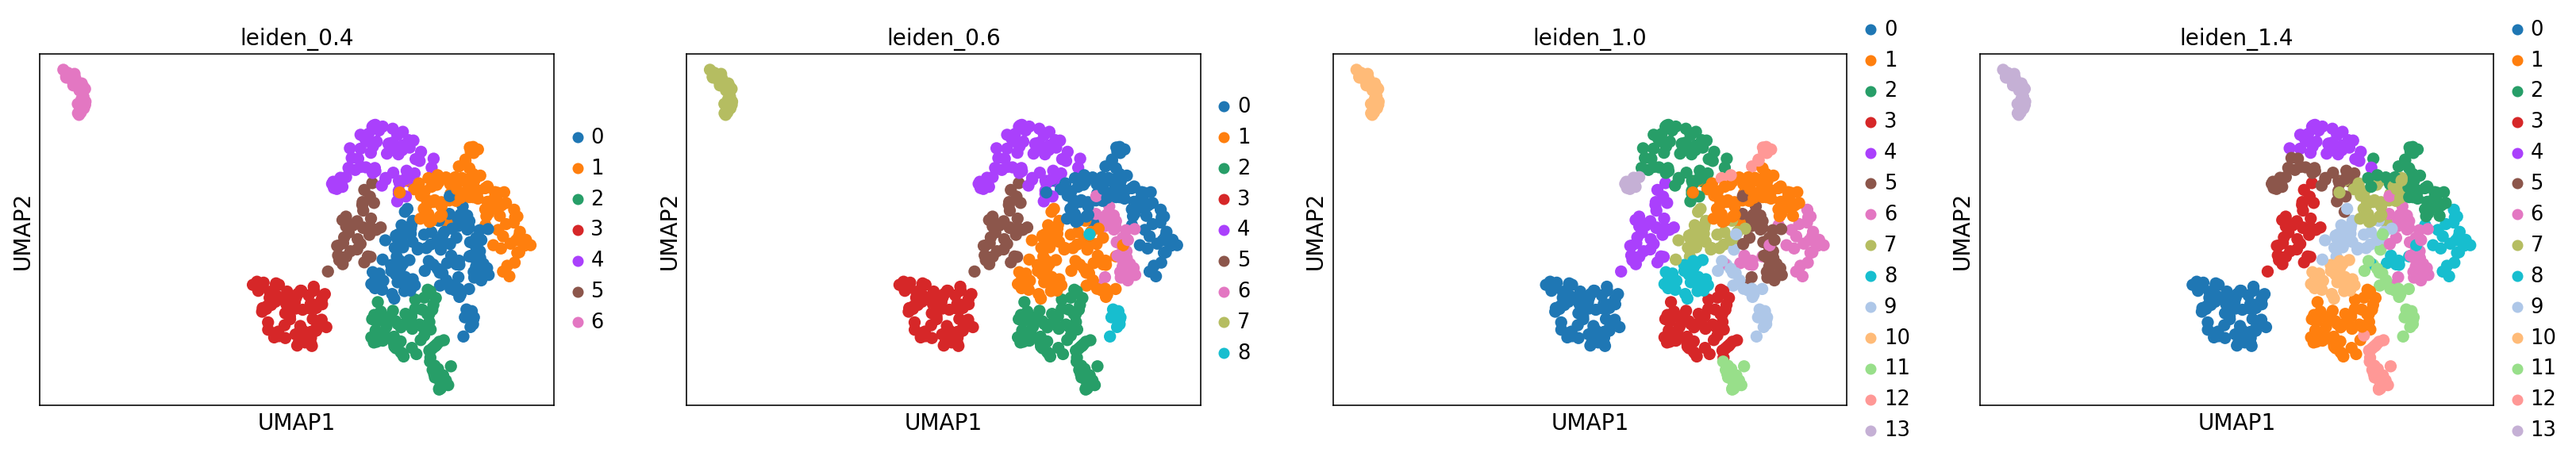

In [38]:
sc.pl.umap(adata, color=['leiden_0.4', 'leiden_0.6', 'leiden_1.0','leiden_1.4'])

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_0.6']`


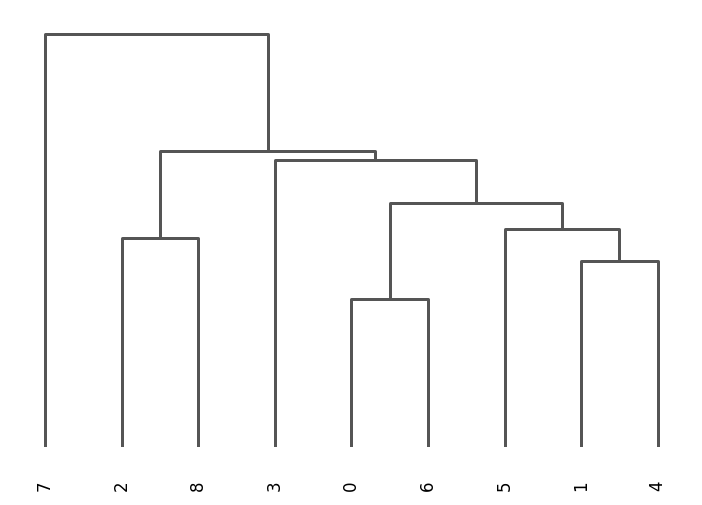

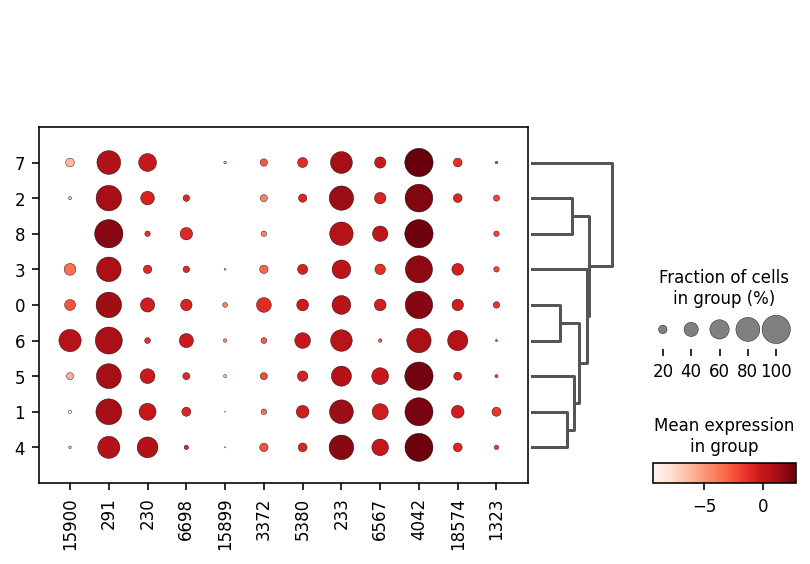

In [39]:
sc.tl.dendrogram(adata, groupby = "leiden_0.6")
sc.pl.dendrogram(adata, groupby = "leiden_0.6")

genes  = ["15900", "291", "230", "6698","15899", "3372","5380","233","6567","4042","18574","1323"]
sc.pl.dotplot(adata, genes, groupby='leiden_0.6', dendrogram=True)

<AxesSubplot:xlabel='leiden_0.6'>

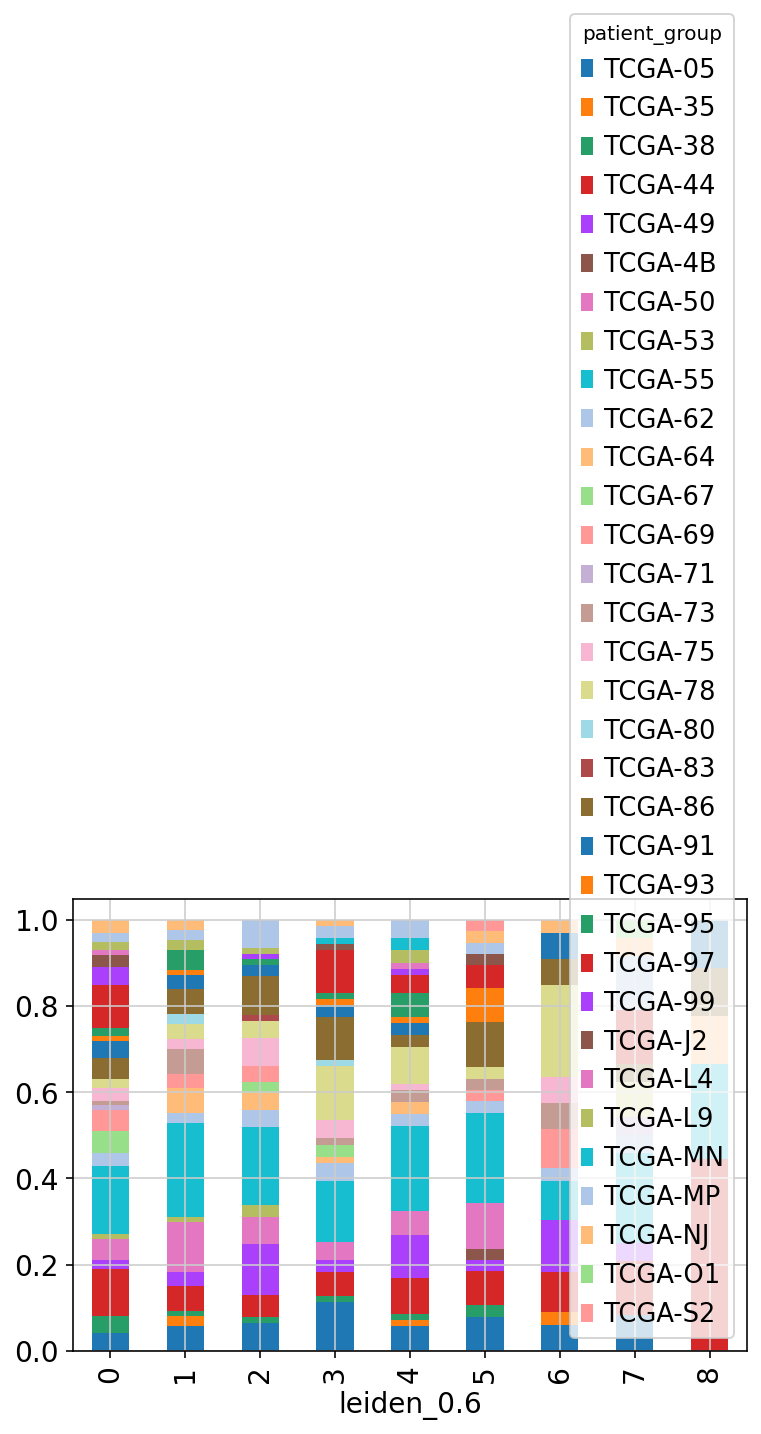

In [40]:
tmp = pd.crosstab(adata.obs['leiden_0.6'],adata.obs['patient_group'], normalize='index')
tmp.plot.bar(stacked=True)#.legend(loc='lower right')

## Louvain

running Leiden clustering
    finished: found 14 clusters and added
    'louvain_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 9 clusters and added
    'louvain_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 7 clusters and added
    'louvain_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 14 clusters and added
    'louvain_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


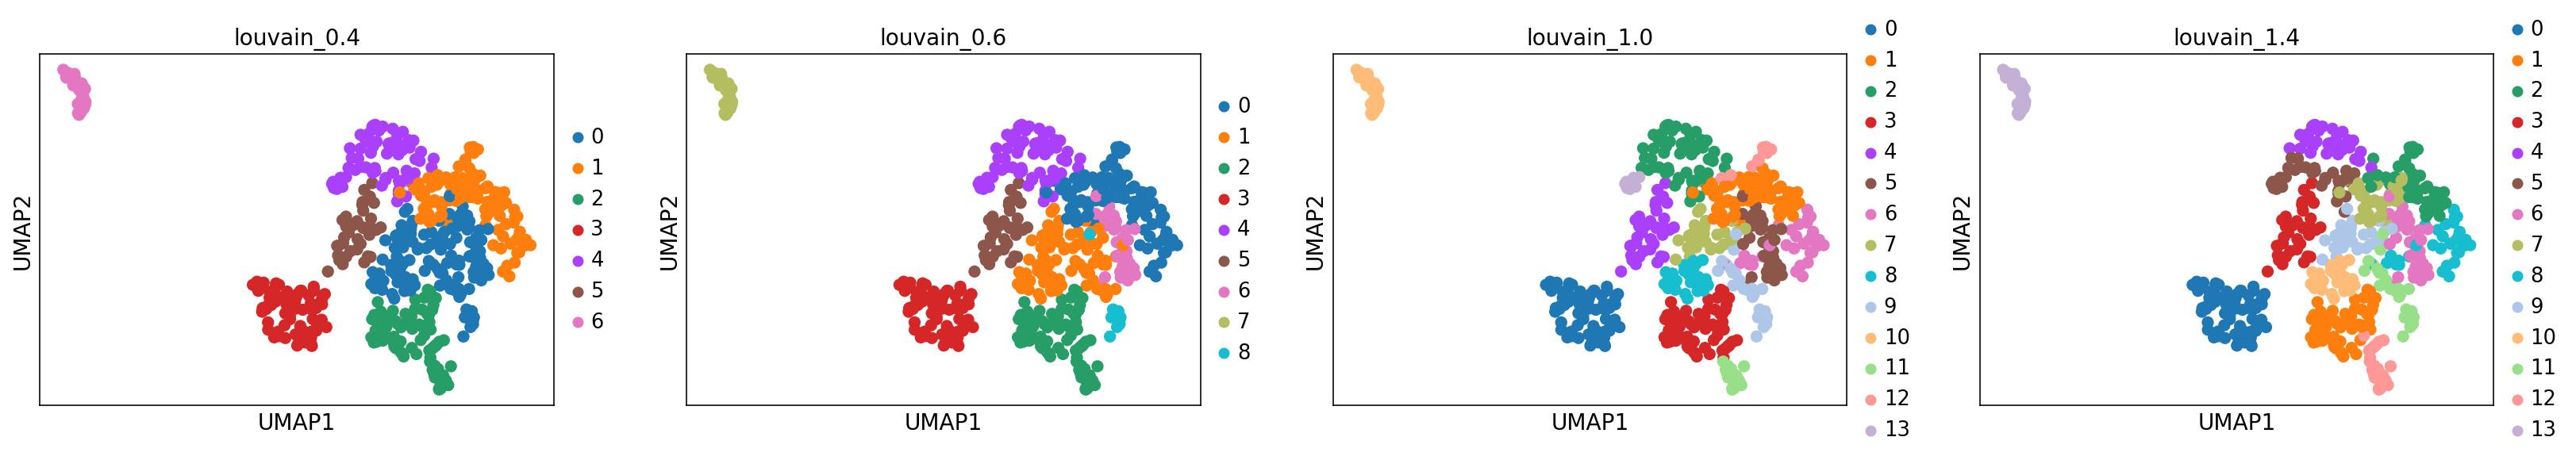

In [41]:
sc.tl.leiden(adata, key_added = "louvain_1.0") # default resolution is 1.0
sc.tl.leiden(adata, resolution = 0.6, key_added = "louvain_0.6")
sc.tl.leiden(adata, resolution = 0.4, key_added = "louvain_0.4")
sc.tl.leiden(adata, resolution = 1.4, key_added = "louvain_1.4")

sc.pl.umap(adata, color=['louvain_0.4', 'louvain_0.6', 'louvain_1.0','louvain_1.4'])

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain_0.6']`


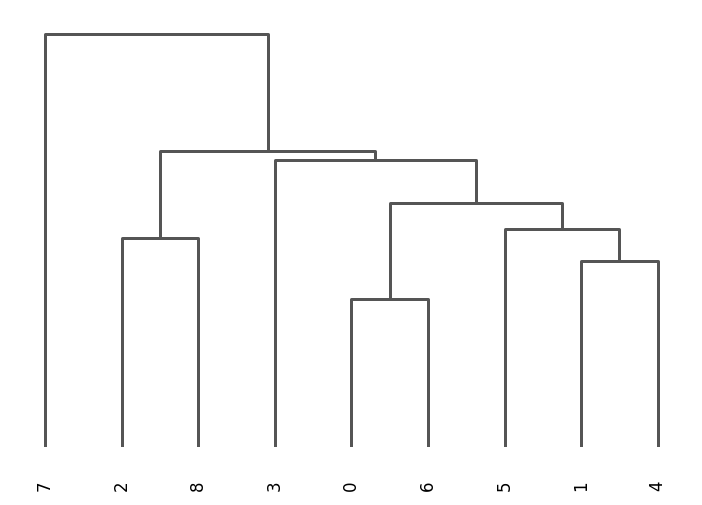

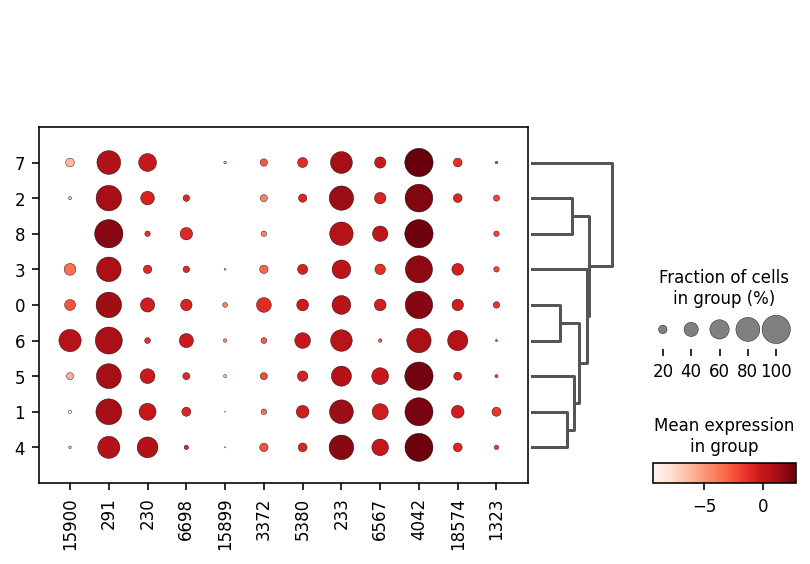

In [42]:
sc.tl.dendrogram(adata, groupby = "louvain_0.6")
sc.pl.dendrogram(adata, groupby = "louvain_0.6")

genes  = ["15900", "291", "230", "6698","15899", "3372","5380","233","6567","4042","18574","1323"]

sc.pl.dotplot(adata, genes, groupby='louvain_0.6', dendrogram=True)

## K-means Clustering

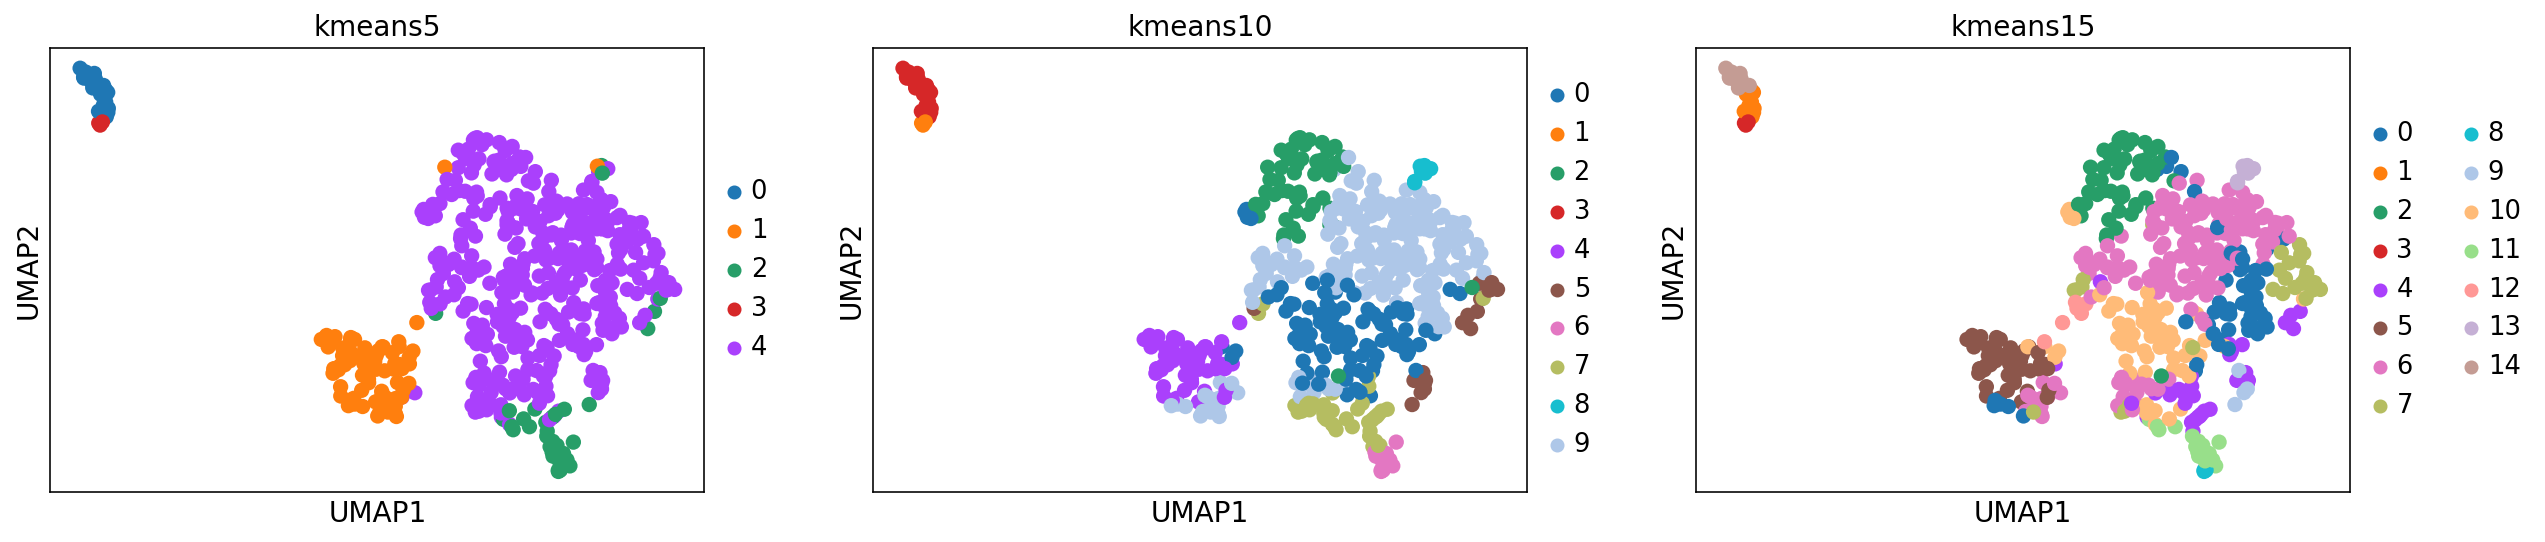

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# extract pca coordinates
X_pca = adata.obsm['X_pca'] 

# kmeans with k=5
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca) 
adata.obs['kmeans5'] = kmeans.labels_.astype(str)

# kmeans with k=10
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_pca) 
adata.obs['kmeans10'] = kmeans.labels_.astype(str)

# kmeans with k=15
kmeans = KMeans(n_clusters=15, random_state=0).fit(X_pca) 
adata.obs['kmeans15'] = kmeans.labels_.astype(str)

sc.pl.umap(adata, color=['kmeans5', 'kmeans10', 'kmeans15'])

## Hierarchical clustering

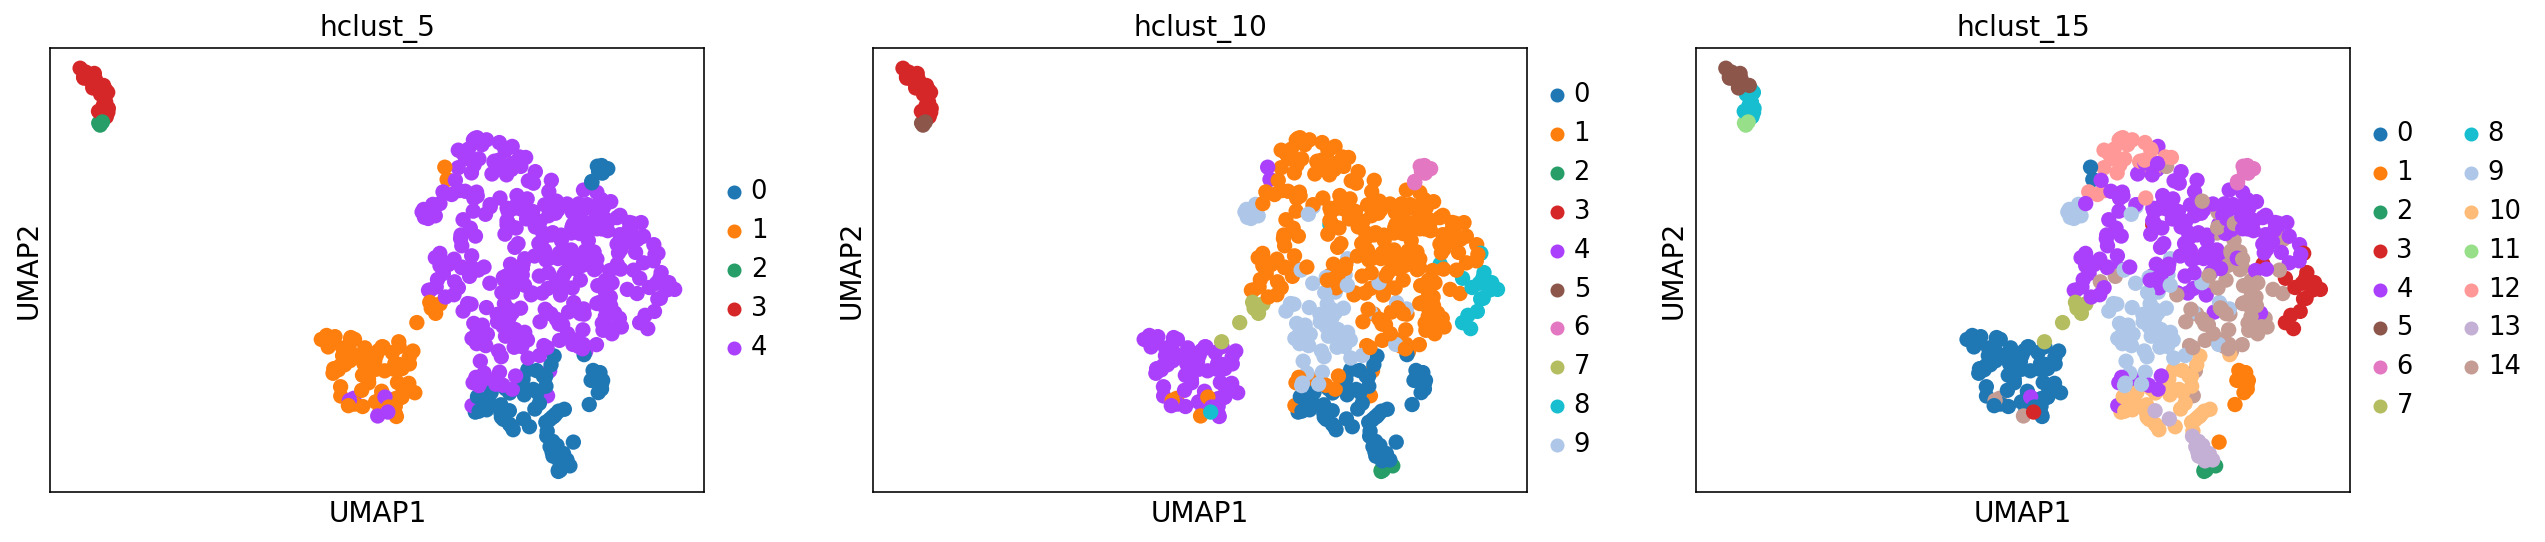

In [45]:
from sklearn.cluster import AgglomerativeClustering


cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
adata.obs['hclust_5'] = cluster.fit_predict(X_pca).astype(str)

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
adata.obs['hclust_10'] = cluster.fit_predict(X_pca).astype(str)

cluster = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward')
adata.obs['hclust_15'] = cluster.fit_predict(X_pca).astype(str)


sc.pl.umap(adata, color=['hclust_5', 'hclust_10', 'hclust_15'])